# Tasca Feature Engineering

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
from sklearn.decomposition import PCA
import seaborn as sns

## Exercici 1

Agafa un conjunt de dades de tema esportiu que t'agradi i normalitza els atributs categòrics en dummy. Estandaritza els atributs numèrics amb StandardScaler.

### Dataset

The selected dataset is [120 years of Olympic history: athletes and results](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results) which collects the athletes participating in the modern Olympic Games from Athens 1896 to Rio 2016. It has de following columns:
1. **ID**: unique numeric identifier for each athlete,
2. **Name**: name of the athlete,
3. **Sex**: masculine (M) of femenine (F) sex of the athlete,
4. **Age**: age of the athlete,
5. **Height**: height in centimeters,
6. **Weight**: weight in kilograms,
7. **Team**: team name,
8. **NOC**: national olympic comitte (3 letter code),
9. **Games**: year and season of the olympic games,
10. **Year**: year of the olympic games,
11. **Season**: season of the olympic games (summer or winter),
12. **City**: host city of the olympic games,
13. **Sport**: sport,
14. **Event**: event,
15. **Medal**: won medal: gold, silver, bronze or NA

In [2]:
# Load the dataset
df = pd.read_csv('athlete_events.csv')

In [3]:
# View the dataset
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
# Check columns, nulls, dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


### Feature selection

To predict if an athlete will win a gold, silver, bronze or none medal, we use the attributes Sex, Age, Height, Weight, NOC and Sport. Therefore, we will remove the columns regarding the identification of the athlete (ID and Name) and the columns derived from others (for example Year, Season and City depend on Games, Event depends on Sport and Team on NOC).

In [5]:
df.drop(['ID', 'Name', 'Year', 'Season', 'City', 'Event', 'Team'], axis=1, inplace=True)

### Missing values

To handle missing values, we are going use the simplest strategy, remove records missing a value. In this case, missing values in the features columns (Age, Height and Weight), whereas missing values in the target column Medal, will be filled with None.

In [6]:
df['Medal'] = df['Medal'].fillna('None')

In [7]:
df = df.dropna()

### Normalize categorical features into dummy

In [8]:
# Get dummies from categorical features
features_dummified = pd.get_dummies(df['Sex'])
features_dummified.rename(columns={'F': 'Sex_F'}, inplace=True)
features_dummified = features_dummified[['Sex_F']] #Since sex is binary, we only need one column to encode the information

### Standarize numerical features with StandardScaler

In [9]:
# Standardize the numerical features with StandardScaler which uses the mean and standard deviation
features_numerical = df[['Age', 'Height', 'Weight']].values
features_std_standard = pd.DataFrame(StandardScaler().fit_transform(features_numerical), columns=['Age', 'Height', 'Weight'])

## Exercici 2

Continua amb el conjunt de dades de tema esportiu que t'agradi i aplica l'anàlisi de components principals.

In [10]:
# Add dummified categorical variables to numerical standarized data
x = np.hstack([features_std_standard, features_dummified])

In [11]:
# Principal components analysis
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)

In [12]:
df_pca = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4'])
df_pca['Medal'] = df['Medal'].values
df_pca.head()

,PC 1,PC 2,PC 3,PC 4,Medal
0,0.738627,-0.389591,0.186665,-0.154221,None
1,-0.875953,-0.140199,-0.094084,-0.514231,None
2,0.804472,-1.023856,-0.124528,0.865643,None
3,0.804472,-1.023856,-0.124528,0.865643,None
4,1.000065,-0.323012,-0.174292,0.882322,None


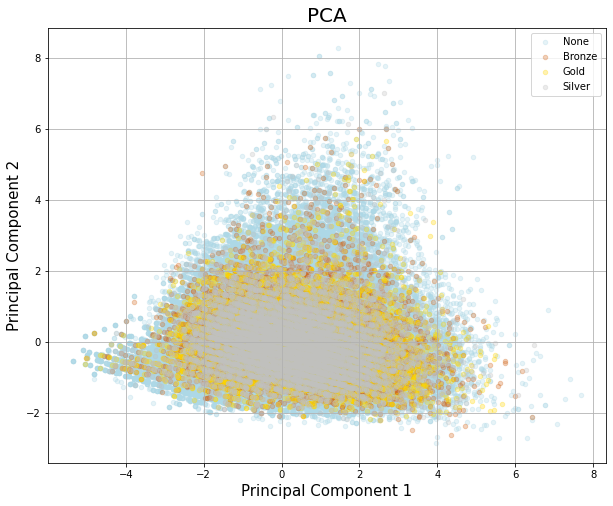

In [13]:
# Visualize the PCA
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot() 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = df['Medal'].unique().tolist()
colors = ['lightblue', 'chocolate', 'gold', 'silver']
for t, color in zip(targets,colors):
    ax.scatter(df_pca.loc[df_pca['Medal'] == t, 'PC 1'],
               df_pca.loc[df_pca['Medal'] == t, 'PC 2'], 
               c = color, s = 20, alpha=0.3)
ax.legend(targets)
ax.grid()

In [14]:
# Explained variance
pca.explained_variance_ratio_

array([0.60158503, 0.28941012, 0.06238112, 0.04662373])

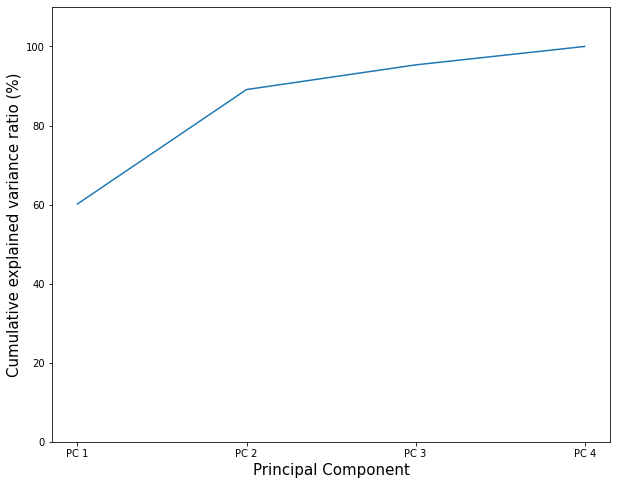

In [15]:
# Cumulative explained variance
x = range(4)
y = np.cumsum(pca.explained_variance_ratio_) * 100
fig = plt.figure(figsize=(10,8))
plt.plot(x, y)
plt.xticks(range(4), ['PC 1', 'PC 2', 'PC 3', 'PC 4'])
plt.ylim(0,110)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Cumulative explained variance ratio (%)', fontsize = 15);

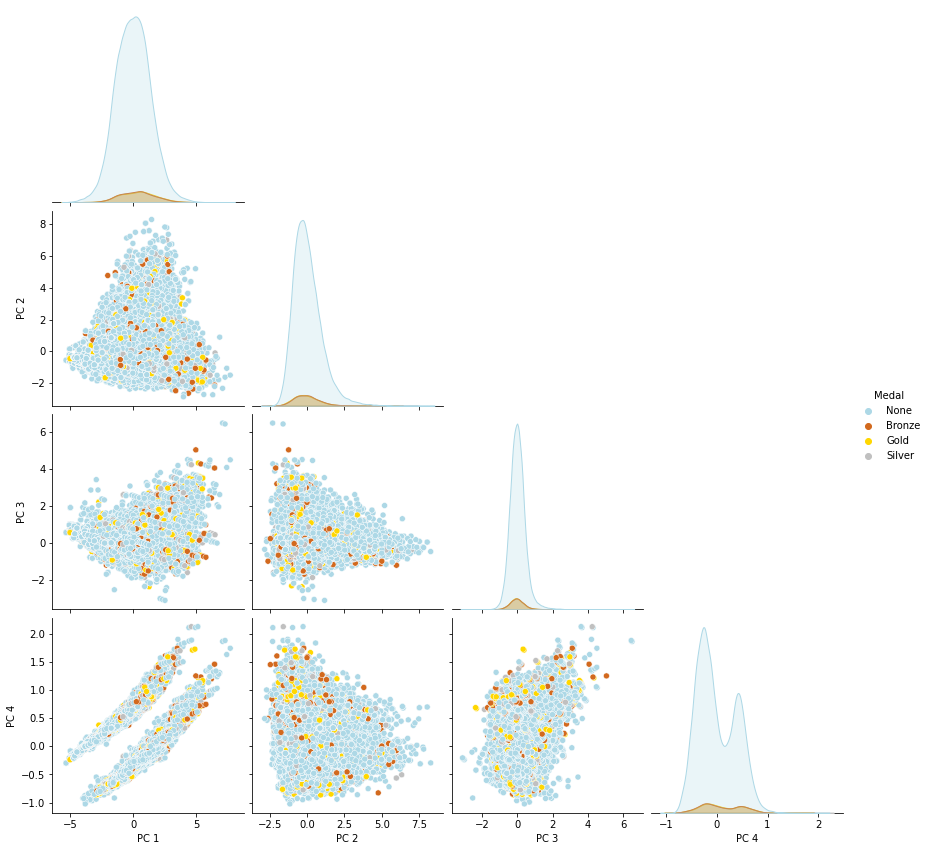

In [16]:
# PCA pair-plot
sns.pairplot(df_pca, hue='Medal', corner=True, height=3, palette={'None': 'lightblue', 'Gold': 'gold', 'Silver': 'silver', 'Bronze': 'chocolate'})

## Exercici 3

Continua amb el conjunt de dades de tema esportiu que t'agradi i normalitza les dades tenint en compte els outliers.

In [17]:
# View outliers
outliers = []
for column in ['Age', 'Height', 'Weight']:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    low_outliers = df[df[column] < (q1 - 1.5 * IQR)]
    high_outliers = df[df[column] > (q3 + 1.5 * IQR)]
    outliers.append([column, len(low_outliers), len(high_outliers), 
                     len(low_outliers) / len(df) * 100, len(high_outliers) / len(df) * 100])
outliers = pd.DataFrame(outliers, columns=['Feature', '# Low outliers', '# High outliers', '% Low outliers', '% High outliers'])
outliers

,Feature,# Low outliers,# High outliers,% Low outliers,% High outliers
0,Age,0,4631,0.000000,2.246259
1,Height,678,632,0.328863,0.306551
2,Weight,85,3089,0.041229,1.498314


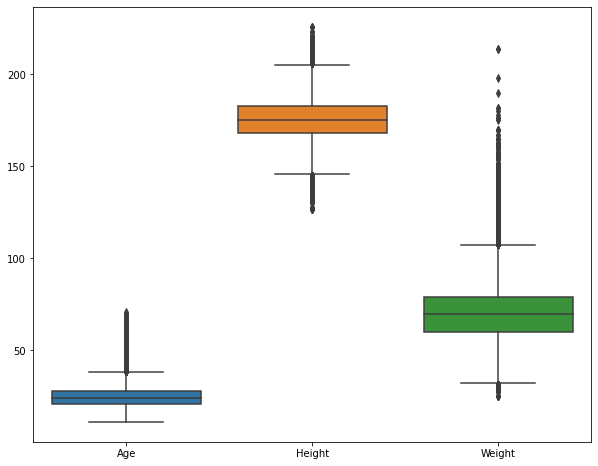

In [18]:
# Boxplot of numerical features
fig = plt.figure(figsize=(10,8))
sns.boxplot(data=df[['Age', 'Height', 'Weight']]);

In [19]:
# Management of outliers with RobustScaler which uses the median and IQR
features_std_robust = pd.DataFrame(RobustScaler().fit_transform(features_numerical), columns=['Age', 'Height', 'Weight'])

In [20]:
# Management of outliers with PowerTransformer which maps the data to a normal distribution
features_std_power = pd.DataFrame(PowerTransformer().fit_transform(features_numerical), columns=['Age', 'Height', 'Weight'])

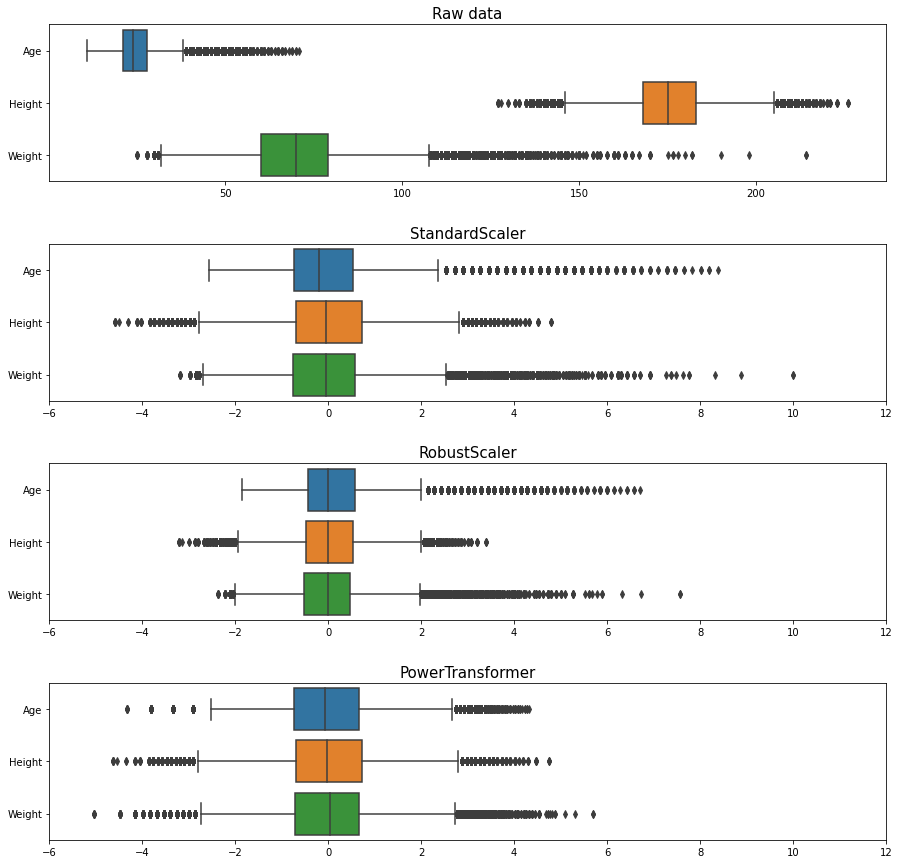

In [21]:
# Comparison of StandardScaler, RobustScaler and PowerTransformer
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.4)

plt.subplot(4,1,1)
plt.title('Raw data', fontsize=15)
sns.boxplot(data=df[['Age', 'Height', 'Weight']], orient='h')

plt.subplot(4,1,2)
plt.xlim(-6, 12)
plt.title('StandardScaler', fontsize=15)
sns.boxplot(data=features_std_standard, orient='h')

plt.subplot(4,1,3)
plt.xlim(-6, 12)
plt.title('RobustScaler', fontsize=15)
sns.boxplot(data=features_std_robust, orient='h')

plt.subplot(4,1,4)
plt.xlim(-6, 12)
plt.title('PowerTransformer', fontsize=15)
sns.boxplot(data=features_std_power, orient='h');